## GPT Labeler example

Imports

In [43]:
from cord19_plus.labelers import GPT, GPTVision
import ir_datasets
import autoqrels
import cv2
import matplotlib.pyplot as plt
import pandas as pd

To use the GPT labeler you need to provide an API Key

In [44]:
OPENAI_API_KEY = ""

In [45]:
# Load dataset
dsid = "cord19/trec-covid"
dataset = ir_datasets.load(dsid)

When not prompt is supplied the standard prompt is used. When supplying a prompt you need to mark the places where the document will be placed with UNK_DOC_TEXT and the query with QUERY_TEXT.

The standard prompt for the GPT labeler is:

>
>Instruction: Indicate if the document is relevant to the query. Only answer with 0, 1, 2 where 0 is the lowest grade and 2 the highest. 
>Query: QUERY_TEXT, Document: UNK_DOC_TEXT, Relevant:


In [46]:
gpt = GPT(dataset, OPENAI_API_KEY, "gpt-4o-mini")

In [47]:
# The gpt labeler is able to estimate the prices the standard values it uses are for gpt-4o-mini july 2024 but you can pass newer values to the function aswell.

gpt.estimate_price("This is a very real document. Gee I wonder what this would cost to label??")

9.6e-06

## Use labeler with ir dataset

In [48]:
# create a run file using the dataset
all_qrels_as_run = pd.DataFrame(dataset.qrels).rename(columns={"relevance": "score"}).head(5)
all_qrels_as_run

,query_id,doc_id,score,iteration
0,1,005b2j4b,2,4.5
1,1,00fmeepz,1,4
2,1,010vptx3,2,0.5
3,1,0194oljo,1,2.5
4,1,021q9884,1,4


In [49]:
# pass the run file to the labeler
gpt.infer_qrels(all_qrels_as_run)

,query_id,doc_id,relevance,iteration
0,1,005b2j4b,2,1
1,1,00fmeepz,2,1
2,1,010vptx3,2,1
3,1,0194oljo,0,1
4,1,021q9884,1,1


## Use labeler with own data

To make use of the labeler with our own data we will bypass the official infer_qrels function and directly call the function used to generate the labels. 

In [50]:
# input could be a document text but can also be the str rep of a json file
document = {
    "title": "Table 1 ACE Inhibitors and coronavirus",
    "publication_title": "Some publication about ACE Inhibitors",
    "relation": [["Drug", "Dosage"], ["Some drug", "42mg/d"]],
}
print(f"Is document: \n{document} \nrelevant for this query: {autoqrels.text.query_text(dataset, ['20'], None)}")
gpt._infer_zeroshot_text(autoqrels.text.query_text(dataset, ['20'], None), [str(document)])

Is document: 
{'title': 'Table 1 ACE Inhibitors and coronavirus', 'publication_title': 'Some publication about ACE Inhibitors', 'relation': [['Drug', 'Dosage'], ['Some drug', '42mg/d']]} 
relevant for this query: ['coronavirus and ACE inhibitors']


['1']

## Use the vision model

Because there currently is no ir_dataset containing images we will always use the "bypass" method for this labeler.

When not prompt is supplied the standard prompt is used. When supplying a prompt you need to mark the places where the query will be with QUERY_TEXT.

The standard prompt for the GPTVision labeler is:

>Instruction: Indicate if the document is relevant to the query. Only answer with 0, 1, 2 where 0 is the lowest grade and 2 the highest. Query: QUERY_TEXT, Relevant:



In [51]:
gptv = GPTVision(dataset, OPENAI_API_KEY, "gpt-4o-mini")

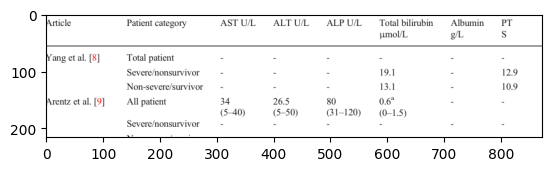

In [52]:
# we will use this image in our example
im = cv2.imread("images/rel_image.png")
plt.imshow(im)

The image labeler is also able to estimate the price of an image input as well as the prompt. Standard values are also for gpt-4o-mini july 2024 for can be altered.

In [53]:
gptv.estimate_price("images/rel_image.png")

0.0021336000000000003

In [54]:
gptv._infer_zeroshot_image(["38"], ["images/rel_image.png"])

['1']